# How to Run EmFit on a Jupyter Notebook

Ragadeepika Pucha (U.Utah)

## Kernel Requirement

You need `DESI 22.5` kernel to run EmFit. Make sure to select this kernel when launching this notebook. 

In [1]:
## Imports
import numpy as np
from astropy.table import Table, Column

## DESI-related imports
from desispec.io import specprod_root

## Add EmFit to the path
import sys
sys.path.append('/global/cfs/cdirs/desicollab/users/raga19/repos/EmFit/py')   ## Change this path to wherever the repository is in your system

## EmFit related imports
import emline_fitting as emfit
import plot_utils

## Matplotlib related imports
import matplotlib.pyplot as plt

## Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
## Making the matplotlib plots look nicer
settings = {
    'font.size':22,
    'axes.linewidth':2.0,
    'xtick.major.size':6.0,
    'xtick.minor.size':4.0,
    'xtick.major.width':2.0,
    'xtick.minor.width':1.5,
    'xtick.direction':'in', 
    'xtick.minor.visible':True,
    'xtick.top':True,
    'ytick.major.size':6.0,
    'ytick.minor.size':4.0,
    'ytick.major.width':2.0,
    'ytick.minor.width':1.5,
    'ytick.direction':'in', 
    'ytick.minor.visible':True,
    'ytick.right':True
}

plt.rcParams.update(**settings)

In [3]:
## Load Fuji zpix file

specprod = 'fuji'
specprod_dir = specprod_root(specprod)
zcat_dir = f'{specprod_dir}/zcatalog'
filename = f'zall-pix-{specprod}.fits'

## zpix catalog
zcat = Table.read(f'{zcat_dir}/{filename}')

In [4]:
## Applying the cuts that we apply for EmFit source selection

good_fiber = (zcat['COADD_FIBERSTATUS'].data == 0)
good_z = (zcat['ZWARN'].data == 0)|(zcat['ZWARN'].data == 4)
prim_spec = (zcat['ZCAT_PRIMARY'])
spec_cut = (zcat['SPECTYPE'].astype(str).data == 'GALAXY')|(zcat['SPECTYPE'].astype(str).data == 'QSO')
z_cut = (zcat['Z'].data >= 0.001)&(zcat['Z'].data <= 0.45)

In [5]:
all_cuts = good_fiber&good_z&prim_spec&spec_cut&z_cut

## Selected catalog
t = zcat[all_cuts]

In [6]:
print ('Total # of Spectra: ', len(zcat))
print ('# of selected sources: ', len(t))

Total # of Spectra:  2847435
# of selected sources:  512429


In [7]:
## Variables required for fitting

targetid = t['TARGETID'].data
survey = t['SURVEY'].astype(str).data
program = t['PROGRAM'].astype(str).data
healpix = t['HEALPIX'].data
z = t['Z'].data

## Running EmFit

In [8]:
## Use the fit_spectra() function

help(emfit.fit_spectra)

Help on function fit_spectra in module emline_fitting:

fit_spectra(specprod, survey, program, healpix, targetid, z)
    Function to fit a single spectrum.
    
    Parameters 
    ----------
    specprod : str
        Spectral Production Pipeline name 
        fuji|guadalupe|...
        
    survey : str
        Survey name for the spectrum
        
    program : str
        Program name for the spectrum
        
    healpix : str
        Healpix number of the target
        
    targets : int64
        Unique TARGETID of the target
        
    z : float
        Redshift of the target
        
    Returns
    -------
    t_final : astropy table
        Table of fit parameters



In [9]:
## Select a source based on "TARGETID"
## Try different TARGETIDs or indices
## Some examples:
## 39633551729101861 --> Extreme BL object
## 39628478466755896 --> Narrow line object
## 39628261990335599 --> Source with [OIII] outflow
## 39628504546936705 --> Double peaked emission-lines

tgt = 39628504538546864

## Find where the tgt is located
ii = np.nonzero(targetid == tgt)[0][0]           ## If selecting based on TARGETID
#ii = 7060                                       ## If selecting based on row number
print (ii)

102


In [10]:
## Run EmFit

res = emfit.fit_spectra(specprod, survey[ii], program[ii], healpix[ii], targetid[ii], z[ii])

INFO:spectra.py:291:read_spectra: iotime 1.620 sec to read coadd-cmx-other-2156.fits at 2024-04-25T20:39:15.255482


In [11]:
## Check the output table

res

TARGETID,SPECPROD,SURVEY,PROGRAM,HEALPIX,Z,PER_BROAD,HB_N_AMPLITUDE,HB_N_AMPLITUDE_ERR,HB_N_MEAN,HB_N_MEAN_ERR,HB_N_STD,HB_N_STD_ERR,HB_N_FLUX,HB_N_FLUX_ERR,HB_N_FLUX_LERR,HB_N_FLUX_UERR,HB_N_SIGMA,HB_N_SIGMA_ERR,HB_N_SIGMA_LERR,HB_N_SIGMA_UERR,HB_N_SIGMA_FLAG,HB_OUT_AMPLITUDE,HB_OUT_AMPLITUDE_ERR,HB_OUT_MEAN,HB_OUT_MEAN_ERR,HB_OUT_STD,HB_OUT_STD_ERR,HB_OUT_FLUX,HB_OUT_FLUX_ERR,HB_OUT_FLUX_LERR,HB_OUT_FLUX_UERR,HB_OUT_SIGMA,HB_OUT_SIGMA_ERR,HB_OUT_SIGMA_LERR,HB_OUT_SIGMA_UERR,HB_OUT_SIGMA_FLAG,HB_B_AMPLITUDE,HB_B_AMPLITUDE_ERR,HB_B_MEAN,HB_B_MEAN_ERR,HB_B_STD,HB_B_STD_ERR,HB_B_FLUX,HB_B_FLUX_ERR,HB_B_FLUX_LERR,HB_B_FLUX_UERR,HB_B_SIGMA,HB_B_SIGMA_ERR,HB_B_SIGMA_LERR,HB_B_SIGMA_UERR,HB_B_SIGMA_FLAG,HB_CONTINUUM,HB_CONTINUUM_ERR,HB_NOISE,HB_NDOF,HB_RCHI2,OIII4959_AMPLITUDE,OIII4959_AMPLITUDE_ERR,OIII4959_MEAN,OIII4959_MEAN_ERR,OIII4959_STD,OIII4959_STD_ERR,OIII4959_FLUX,OIII4959_FLUX_ERR,OIII4959_FLUX_LERR,OIII4959_FLUX_UERR,OIII4959_SIGMA,OIII4959_SIGMA_ERR,OIII4959_SIGMA_LERR,OIII4959_SIGMA_UERR,OIII4959_SIGMA_FLAG,OIII4959_OUT_AMPLITUDE,OIII4959_OUT_AMPLITUDE_ERR,OIII4959_OUT_MEAN,OIII4959_OUT_MEAN_ERR,OIII4959_OUT_STD,OIII4959_OUT_STD_ERR,OIII4959_OUT_FLUX,OIII4959_OUT_FLUX_ERR,OIII4959_OUT_FLUX_LERR,OIII4959_OUT_FLUX_UERR,OIII4959_OUT_SIGMA,OIII4959_OUT_SIGMA_ERR,OIII4959_OUT_SIGMA_LERR,OIII4959_OUT_SIGMA_UERR,OIII4959_OUT_SIGMA_FLAG,OIII5007_AMPLITUDE,OIII5007_AMPLITUDE_ERR,OIII5007_MEAN,OIII5007_MEAN_ERR,OIII5007_STD,OIII5007_STD_ERR,OIII5007_FLUX,OIII5007_FLUX_ERR,OIII5007_FLUX_LERR,OIII5007_FLUX_UERR,OIII5007_SIGMA,OIII5007_SIGMA_ERR,OIII5007_SIGMA_LERR,OIII5007_SIGMA_UERR,OIII5007_SIGMA_FLAG,OIII5007_OUT_AMPLITUDE,OIII5007_OUT_AMPLITUDE_ERR,OIII5007_OUT_MEAN,OIII5007_OUT_MEAN_ERR,OIII5007_OUT_STD,OIII5007_OUT_STD_ERR,OIII5007_OUT_FLUX,OIII5007_OUT_FLUX_ERR,OIII5007_OUT_FLUX_LERR,OIII5007_OUT_FLUX_UERR,OIII5007_OUT_SIGMA,OIII5007_OUT_SIGMA_ERR,OIII5007_OUT_SIGMA_LERR,OIII5007_OUT_SIGMA_UERR,OIII5007_OUT_SIGMA_FLAG,OIII_CONTINUUM,OIII_CONTINUUM_ERR,OIII_NOISE,OIII_NDOF,OIII_RCHI2,HB_OIII_NDOF,HB_OIII_RCHI2,NII6548_AMPLITUDE,NII6548_AMPLITUDE_ERR,NII6548_MEAN,NII6548_MEAN_ERR,NII6548_STD,NII6548_STD_ERR,NII6548_FLUX,NII6548_FLUX_ERR,NII6548_FLUX_LERR,NII6548_FLUX_UERR,NII6548_SIGMA,NII6548_SIGMA_ERR,NII6548_SIGMA_LERR,NII6548_SIGMA_UERR,NII6548_SIGMA_FLAG,NII6548_OUT_AMPLITUDE,NII6548_OUT_AMPLITUDE_ERR,NII6548_OUT_MEAN,NII6548_OUT_MEAN_ERR,NII6548_OUT_STD,NII6548_OUT_STD_ERR,NII6548_OUT_FLUX,NII6548_OUT_FLUX_ERR,NII6548_OUT_FLUX_LERR,NII6548_OUT_FLUX_UERR,NII6548_OUT_SIGMA,NII6548_OUT_SIGMA_ERR,NII6548_OUT_SIGMA_LERR,NII6548_OUT_SIGMA_UERR,NII6548_OUT_SIGMA_FLAG,NII6583_AMPLITUDE,NII6583_AMPLITUDE_ERR,NII6583_MEAN,NII6583_MEAN_ERR,NII6583_STD,NII6583_STD_ERR,NII6583_FLUX,NII6583_FLUX_ERR,NII6583_FLUX_LERR,NII6583_FLUX_UERR,NII6583_SIGMA,NII6583_SIGMA_ERR,NII6583_SIGMA_LERR,NII6583_SIGMA_UERR,NII6583_SIGMA_FLAG,NII6583_OUT_AMPLITUDE,NII6583_OUT_AMPLITUDE_ERR,NII6583_OUT_MEAN,NII6583_OUT_MEAN_ERR,NII6583_OUT_STD,NII6583_OUT_STD_ERR,NII6583_OUT_FLUX,NII6583_OUT_FLUX_ERR,NII6583_OUT_FLUX_LERR,NII6583_OUT_FLUX_UERR,NII6583_OUT_SIGMA,NII6583_OUT_SIGMA_ERR,NII6583_OUT_SIGMA_LERR,NII6583_OUT_SIGMA_UERR,NII6583_OUT_SIGMA_FLAG,HA_N_AMPLITUDE,HA_N_AMPLITUDE_ERR,HA_N_MEAN,HA_N_MEAN_ERR,HA_N_STD,HA_N_STD_ERR,HA_N_FLUX,HA_N_FLUX_ERR,HA_N_FLUX_LERR,HA_N_FLUX_UERR,HA_N_SIGMA,HA_N_SIGMA_ERR,HA_N_SIGMA_LERR,HA_N_SIGMA_UERR,HA_N_SIGMA_FLAG,HA_OUT_AMPLITUDE,HA_OUT_AMPLITUDE_ERR,HA_OUT_MEAN,HA_OUT_MEAN_ERR,HA_OUT_STD,HA_OUT_STD_ERR,HA_OUT_FLUX,HA_OUT_FLUX_ERR,HA_OUT_FLUX_LERR,HA_OUT_FLUX_UERR,HA_OUT_SIGMA,HA_OUT_SIGMA_ERR,HA_OUT_SIGMA_LERR,HA_OUT_SIGMA_UERR,HA_OUT_SIGMA_FLAG,HA_B_AMPLITUDE,HA_B_AMPLITUDE_ERR,HA_B_MEAN,HA_B_MEAN_ERR,HA_B_STD,HA_B_STD_ERR,HA_B_FLUX,HA_B_FLUX_ERR,HA_B_FLUX_LERR,HA_B_FLUX_UERR,HA_B_SIGMA,HA_B_SIGMA_ERR,HA_B_SIGMA_LERR,HA_B_SIGMA_UERR,HA_B_SIGMA_FLAG,NII_HA_CONTINUUM,NII_HA_CONTINUUM_ERR,NII_HA_NOISE,NII_HA_NDOF,NII_HA_RCHI2,SII6716_AMPLITUDE,SII6716_AMPLITUDE_ERR,SII6716_MEAN,SII6716_MEAN_ERR,SII6716_STD,SII6716_

## Checking the Fit

In [12]:
## Use the plot_utils.plot_from_params() funtion

help(plot_utils.plot_from_params)

Help on function plot_from_params in module plot_utils:

plot_from_params(table, index, title=None)
    Function to plot the spectra+fits from the table of parameters.
    
    Parameters
    ----------
    table : Astropy table
        Table of fit parameters
        
    index : int
        Index number of the source in the table
        
    title : str
        Title of the plot. Default is None.
        
    Returns
    -------
    fig : Figure
        Figure with spectra + best-fit model



INFO:spectra.py:291:read_spectra: iotime 0.257 sec to read coadd-cmx-other-2156.fits at 2024-04-25T20:39:31.621375


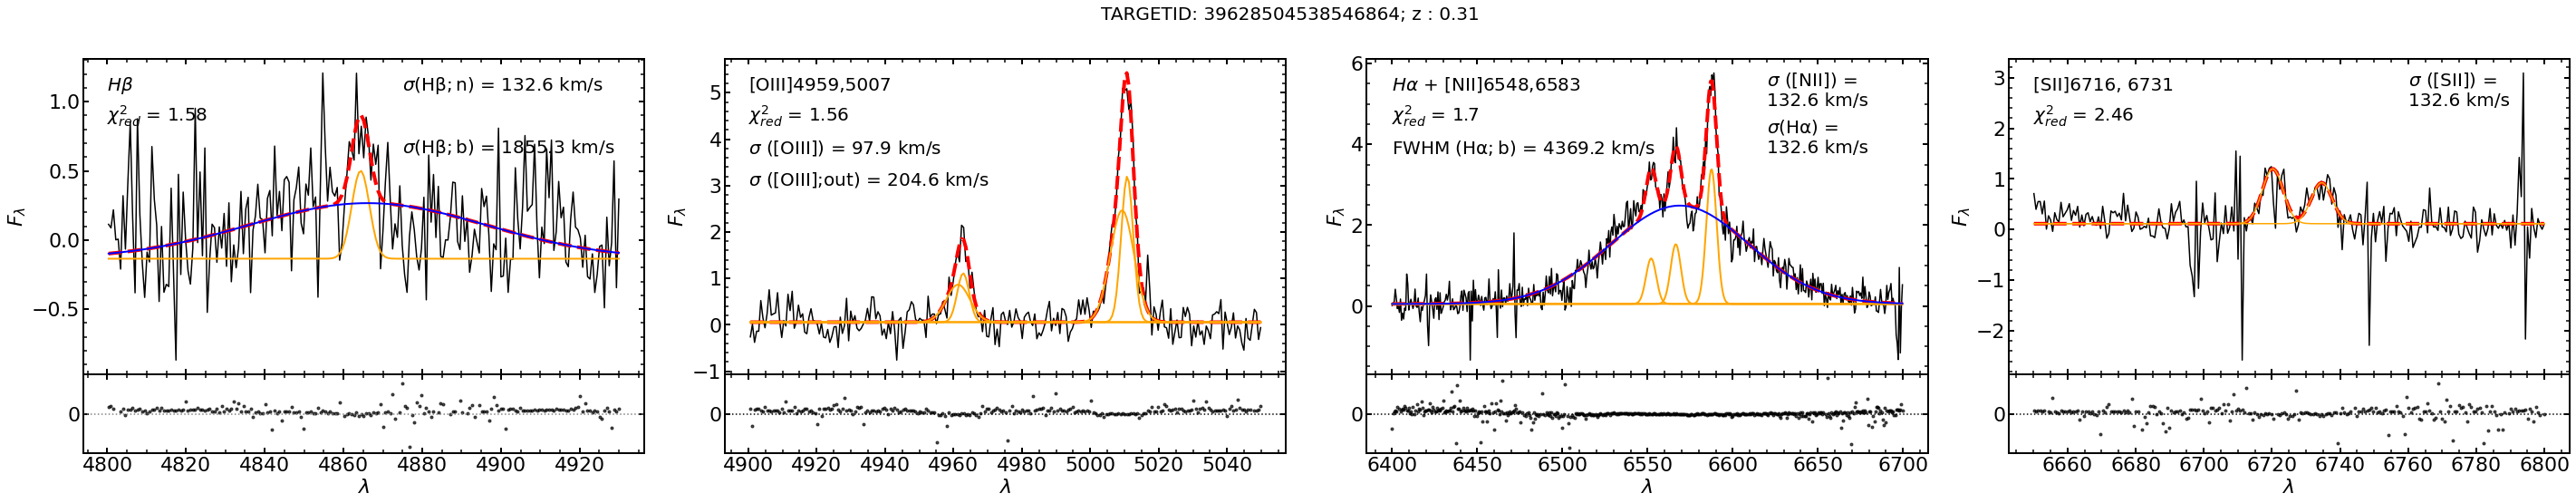

In [13]:
plot_utils.plot_from_params(res, 0)

---